In [3]:
import numpy as np
import pandas as pd
from sensitivity import perturbed_run, sensitivity_analysis
from BESS import process_BESS_table
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
input_df = pd.read_csv("BESS_inputs_salton_sea.csv")
input_df = input_df[input_df.NDVI > 0.1]
input_df = input_df.sample(10000)
input_df

,Unnamed: 0,hour_of_day,day_of_year,latitude,longitude,elevation_km,ST_C,NDVI,NDVI_minimum,NDVI_maximum,...,C4_fraction,carbon_uptake_efficiency,kn,ball_berry_intercept_C3,ball_berry_intercept_C4,ball_berry_slope_C3,ball_berry_slope_C4,peakVCmax_C3,peakVCmax_C4,CI
1477227,2049925,12.983889,210,32.605320,-115.524361,-0.032631,57.330017,0.136962,0.140743,0.307331,...,0.129538,0.08,0.41,0.005,0.04,9.5,5.0,79.276660,50.925217,78.0
1296877,1819928,12.983889,210,32.693173,-115.150348,-0.005860,59.149994,0.106482,0.097372,0.130623,...,0.269342,0.08,0.41,0.005,0.04,9.5,5.0,62.177200,61.886410,82.0
1203984,1710919,12.983889,210,32.744246,-115.759653,-0.040934,57.530000,0.377290,0.118161,0.239861,...,0.300416,0.08,0.41,0.005,0.04,9.5,5.0,64.687035,60.277542,87.0
1432795,1989250,12.983889,210,32.625252,-115.168160,-0.020718,61.209990,0.163607,0.127536,0.283904,...,0.173587,0.08,0.41,0.005,0.04,9.5,5.0,62.097195,61.937695,83.0
902953,1347574,12.983889,210,32.887087,-115.435152,-0.068521,49.070007,0.633337,0.240832,0.686914,...,0.487910,0.08,0.41,0.005,0.04,9.5,5.0,101.000000,37.000000,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956999,1415274,12.983889,210,32.857193,-115.229229,-0.013564,60.690002,0.104945,0.108793,0.210382,...,0.484798,0.08,0.41,0.005,0.04,9.5,5.0,61.764652,62.150864,83.0
690800,1086063,12.983889,210,32.988986,-115.174913,0.043626,60.149994,0.111802,0.089782,0.182928,...,0.676159,0.08,0.41,0.005,0.04,9.5,5.0,62.000000,62.000000,84.0
1497440,2078621,12.983889,210,32.589331,-115.172620,-0.021043,55.050020,0.294174,0.201859,0.470385,...,0.123615,0.08,0.41,0.005,0.04,9.5,5.0,92.568820,42.404602,75.0
144309,234997,12.983889,210,33.327404,-114.898689,0.169189,59.470000,0.118165,0.085666,0.179808,...,1.251543,0.08,0.41,0.005,0.04,9.5,5.0,62.000000,62.000000,78.0


In [10]:
input_variables = ["ST_C", "NDVI", "albedo", "Ta_C", "RH", "VISdiff", "VISdir", "NIRdiff", "NIRdir", "UV"]
output_variables = ["GPP", "Rn", "LE"]

perturbation_df, sensitivity_metrics_df = sensitivity_analysis(
    input_df=input_df,
    input_variables=input_variables,
    output_variables=output_variables,
    forward_process=process_BESS_table
)

sensitivity_metrics_df

/Users/halverso/Projects/ET-Sensitivity/sensitivity/sensitvity.py:117: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perturbation_df = pd.concat([perturbation_df, run_results])
/Users/halverso/Projects/ET-Sensitivity/sensitivity/sensitvity.py:123: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sensitivity_metrics_df = pd.concat([sensitivity_metrics_df, pd.DataFrame([[
/opt/homebrew/Caskroom/miniforge/base/envs/sensitivity/lib/python3.11/site-packages/BESS/LAI_from_NDVI.py:27: RuntimeWarning: divi

,input_variable,output_variable,metric,value
0,ST_C,GPP,correlation,-0.247949
0,ST_C,GPP,r2,0.061479
0,NDVI,GPP,correlation,NaN
0,NDVI,GPP,r2,NaN
0,albedo,GPP,correlation,-0.154756
0,albedo,GPP,r2,0.023950
0,Ta_C,GPP,correlation,-0.110410
0,Ta_C,GPP,r2,0.012190
0,RH,GPP,correlation,NaN
0,RH,GPP,r2,0.000000


In [13]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "GPP") & (df.metric == "correlation")]
df = df.dropna()
df

,input_variable,output_variable,metric,value
0,ST_C,GPP,correlation,-0.247949
0,albedo,GPP,correlation,-0.154756
0,Ta_C,GPP,correlation,-0.110410
0,VISdiff,GPP,correlation,0.155175
0,VISdir,GPP,correlation,0.143135


/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_15545/421560128.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Surface\nTemperature", "Albedo", "Air\nTemperature", "Visible\nDiffuse\nRadiation", "Visible\nDirect\nRadiation"])


Text(0.5, 1.0, 'BESS GPP Sensitivity')

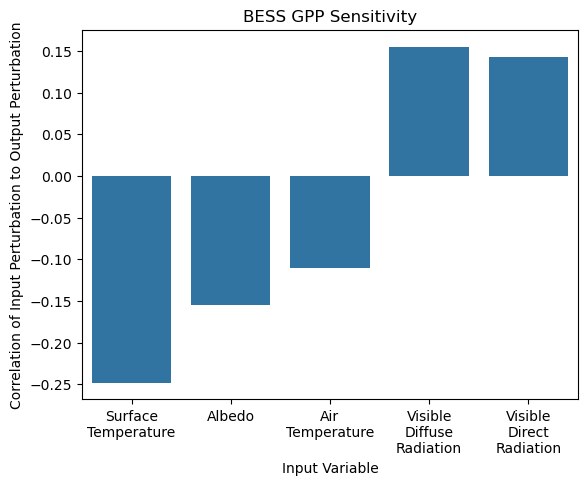

In [15]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "GPP") & (df.metric == "correlation")]
df = df.dropna()
ax = sns.barplot(x=df.input_variable, y=df.value)
ax.set_xticklabels(["Surface\nTemperature", "Albedo", "Air\nTemperature", "Visible\nDiffuse\nRadiation", "Visible\nDirect\nRadiation"])
plt.xlabel("Input Variable")
plt.ylabel("Correlation of Input Perturbation to Output Perturbation")
plt.title("BESS GPP Sensitivity")

In [19]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "GPP") & (df.metric == "r2")]
df = df.dropna()
df = df[df.value>0]
df

,input_variable,output_variable,metric,value
0,ST_C,GPP,r2,0.061479
0,albedo,GPP,r2,0.023950
0,Ta_C,GPP,r2,0.012190
0,VISdiff,GPP,r2,0.024079
0,VISdir,GPP,r2,0.020488


/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_15545/2712883904.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Surface\nTemperature", "Albedo", "Air\nTemperature", "Visible\nDiffuse\nRadiation", "Visible\nDirect\nRadiation"])


Text(0.5, 1.0, 'BESS GPP Sensitivity')

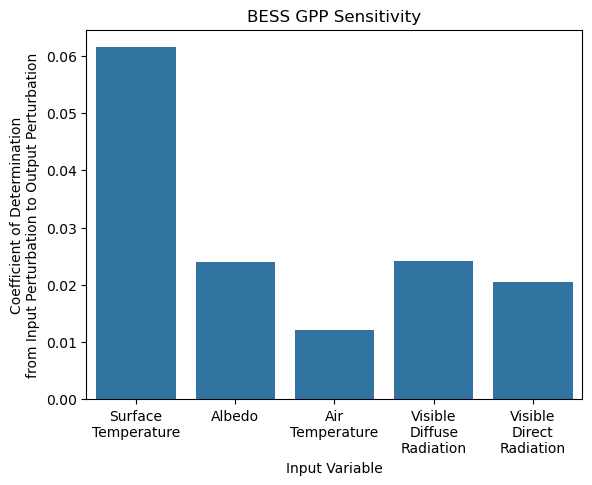

In [22]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "GPP") & (df.metric == "r2")]
df = df.dropna()
df = df[df.value>0]
ax = sns.barplot(x=df.input_variable, y=df.value)
ax.set_xticklabels(["Surface\nTemperature", "Albedo", "Air\nTemperature", "Visible\nDiffuse\nRadiation", "Visible\nDirect\nRadiation"])
plt.xlabel("Input Variable")
plt.ylabel("Coefficient of Determination\nfrom Input Perturbation to Output Perturbation")
plt.title("BESS GPP Sensitivity")

Text(0.5, 1.0, 'BESS Net Radiation Sensitivity')

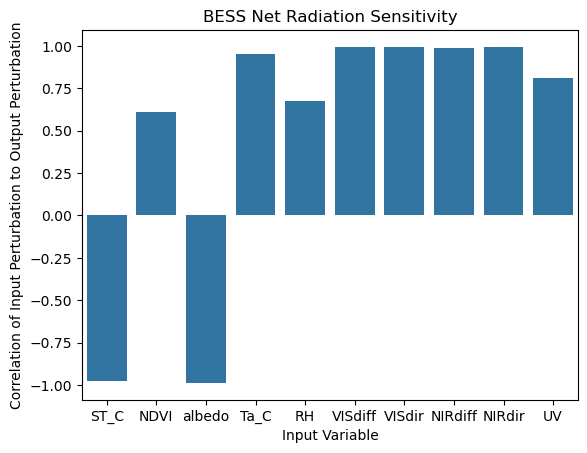

In [23]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "Rn") & (df.metric == "correlation")]
df = df.dropna()
ax = sns.barplot(x=df.input_variable, y=df.value)
# ax.set_xticklabels(["Surface\nTemperature", "Albedo", "Air\nTemperature", "Visible\nDiffuse\nRadiation", "Visible\nDirect\nRadiation"])
plt.xlabel("Input Variable")
plt.ylabel("Correlation of Input Perturbation to Output Perturbation")
plt.title("BESS Net Radiation Sensitivity")

Text(0.5, 1.0, 'BESS Net Radiation Sensitivity')

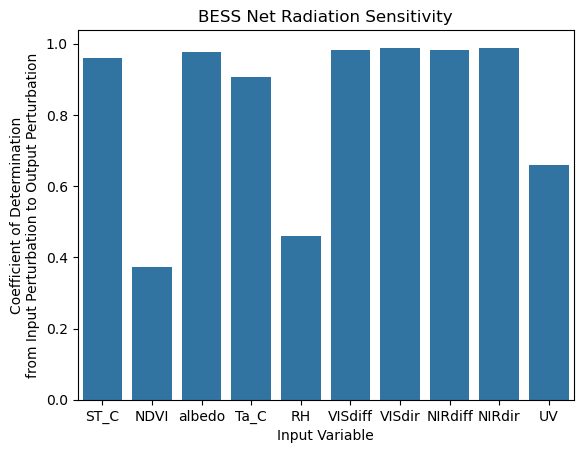

In [24]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "Rn") & (df.metric == "r2")]
df = df.dropna()
df = df[df.value>0]
ax = sns.barplot(x=df.input_variable, y=df.value)
# ax.set_xticklabels(["Surface\nTemperature", "Albedo", "Air\nTemperature", "Visible\nDiffuse\nRadiation", "Visible\nDirect\nRadiation"])
plt.xlabel("Input Variable")
plt.ylabel("Coefficient of Determination\nfrom Input Perturbation to Output Perturbation")
plt.title("BESS Net Radiation Sensitivity")

Text(0.5, 1.0, 'BESS Evapotranspiration Sensitivity')

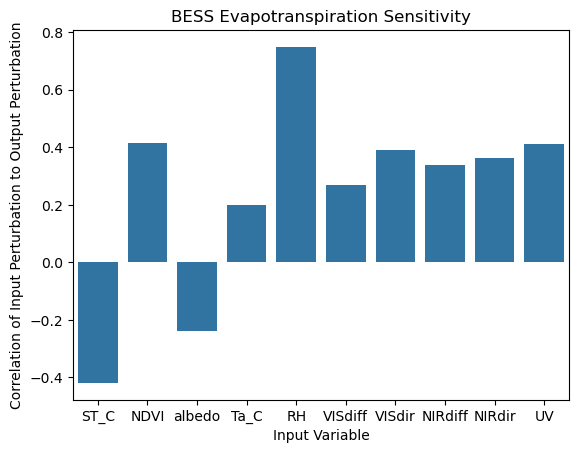

In [25]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "LE") & (df.metric == "correlation")]
df = df.dropna()
ax = sns.barplot(x=df.input_variable, y=df.value)
# ax.set_xticklabels(["Surface\nTemperature", "Albedo", "Air\nTemperature", "Visible\nDiffuse\nRadiation", "Visible\nDirect\nRadiation"])
plt.xlabel("Input Variable")
plt.ylabel("Correlation of Input Perturbation to Output Perturbation")
plt.title("BESS Evapotranspiration Sensitivity")

Text(0.5, 1.0, 'BESS Evapotranspiration Sensitivity')

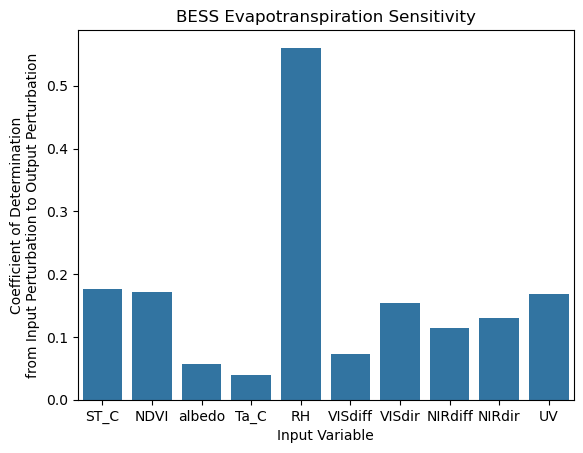

In [26]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "LE") & (df.metric == "r2")]
df = df.dropna()
df = df[df.value>0]
ax = sns.barplot(x=df.input_variable, y=df.value)
# ax.set_xticklabels(["Surface\nTemperature", "Albedo", "Air\nTemperature", "Visible\nDiffuse\nRadiation", "Visible\nDirect\nRadiation"])
plt.xlabel("Input Variable")
plt.ylabel("Coefficient of Determination\nfrom Input Perturbation to Output Perturbation")
plt.title("BESS Evapotranspiration Sensitivity")